# Requirements

In [ ]:
import pandas as pd

In [18]:
# Add as many imports as you need.
# Add as many imports as you need.
# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [1]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 2.69MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [19]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/climate-data.csv")
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [20]:
# Write your code here. Add as many boxes as you need.
df_copy = to_time_series(df, time_feature="date", auto_sort=True)
df_copy

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


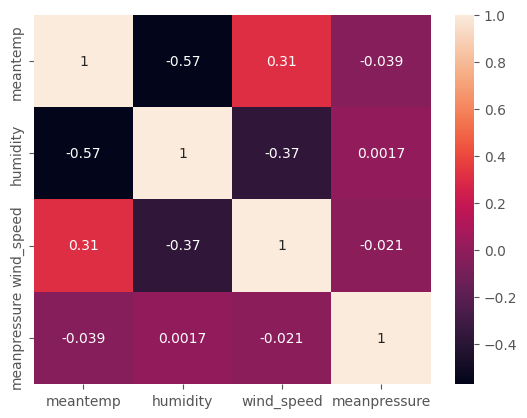

In [21]:
correlation_map(df_copy)

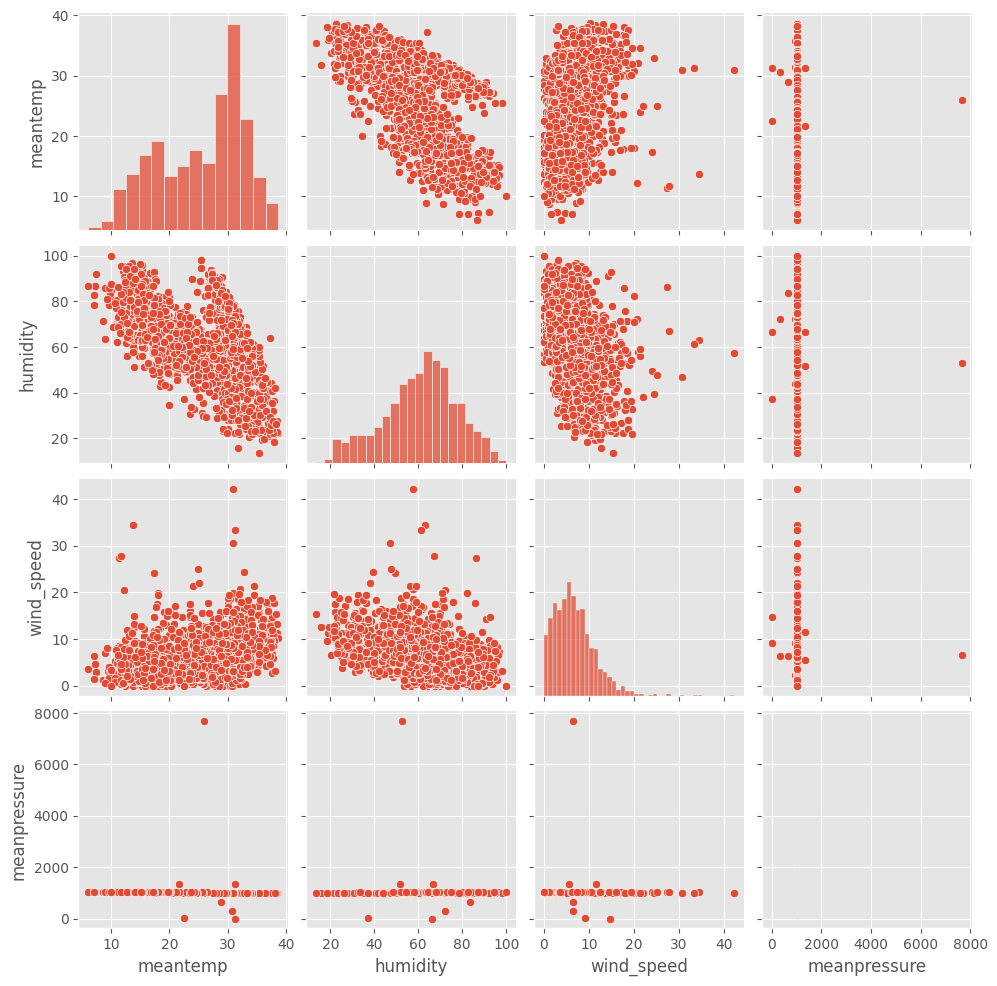

In [22]:
sns.pairplot(df_copy)

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [23]:
# Write your code here. Add as many boxes as you need.
df_copy_1, features = auto_shift(df_copy, lag=3, features_to_shift=get_numerical_features_names(df_copy), return_features=True,
                   auto_drop_na=True)
df_copy_1

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [24]:
# Write your code here. Add as many boxes as you need.
X = df_copy_1[features]
Y = df_copy_1["meantemp"]

In [25]:
X

,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3
date,,,,,,,,,,,,
2013-01-04,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


In [26]:
Y

date
2013-01-04     8.666667
2013-01-05     6.000000
2013-01-06     7.000000
2013-01-07     7.000000
2013-01-08     8.857143
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1459, dtype: float64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [28]:
# Write your code here. Add as many boxes as you need.
# random_forest_regressor = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=200)
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [29]:
# Write your code here. Add as many boxes as you need.
forest_regressor_predict = random_forest_regressor.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [30]:
# Write your code here. Add as many boxes as you need.
regression_report(y_test,forest_regressor_predict)

Regression Report:
Mean Square Error: 3.138280288840846
R2 Score: 0.9020252640021265


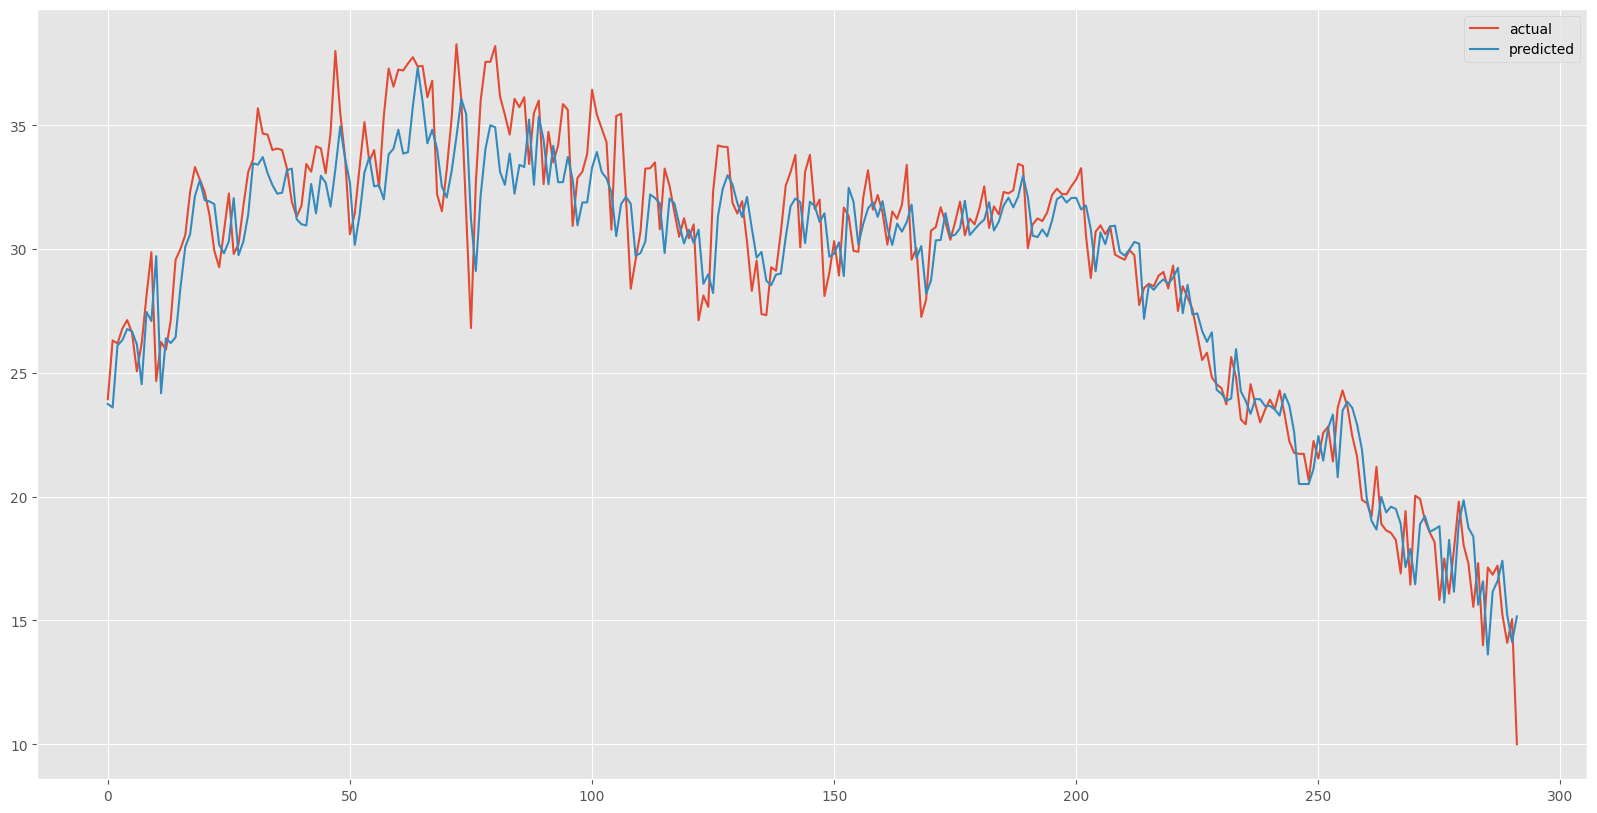

In [31]:
show_time_series_predicts(y_test,forest_regressor_predict)

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [32]:
# Write your code here. Add as many boxes as you need.
xgb_regressor = XGBRegressor(max_depth=4, random_state=0, n_estimators=200)
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

Use the trained model to make predictions for the test set.

In [33]:
# Write your code here. Add as many boxes as you need.
xgb_regressor_predict = xgb_regressor.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [34]:
# Write your code here. Add as many boxes as you need.
regression_report(y_test,xgb_regressor_predict)

Regression Report:
Mean Square Error: 3.81740806131426
R2 Score: 0.8808234088161823


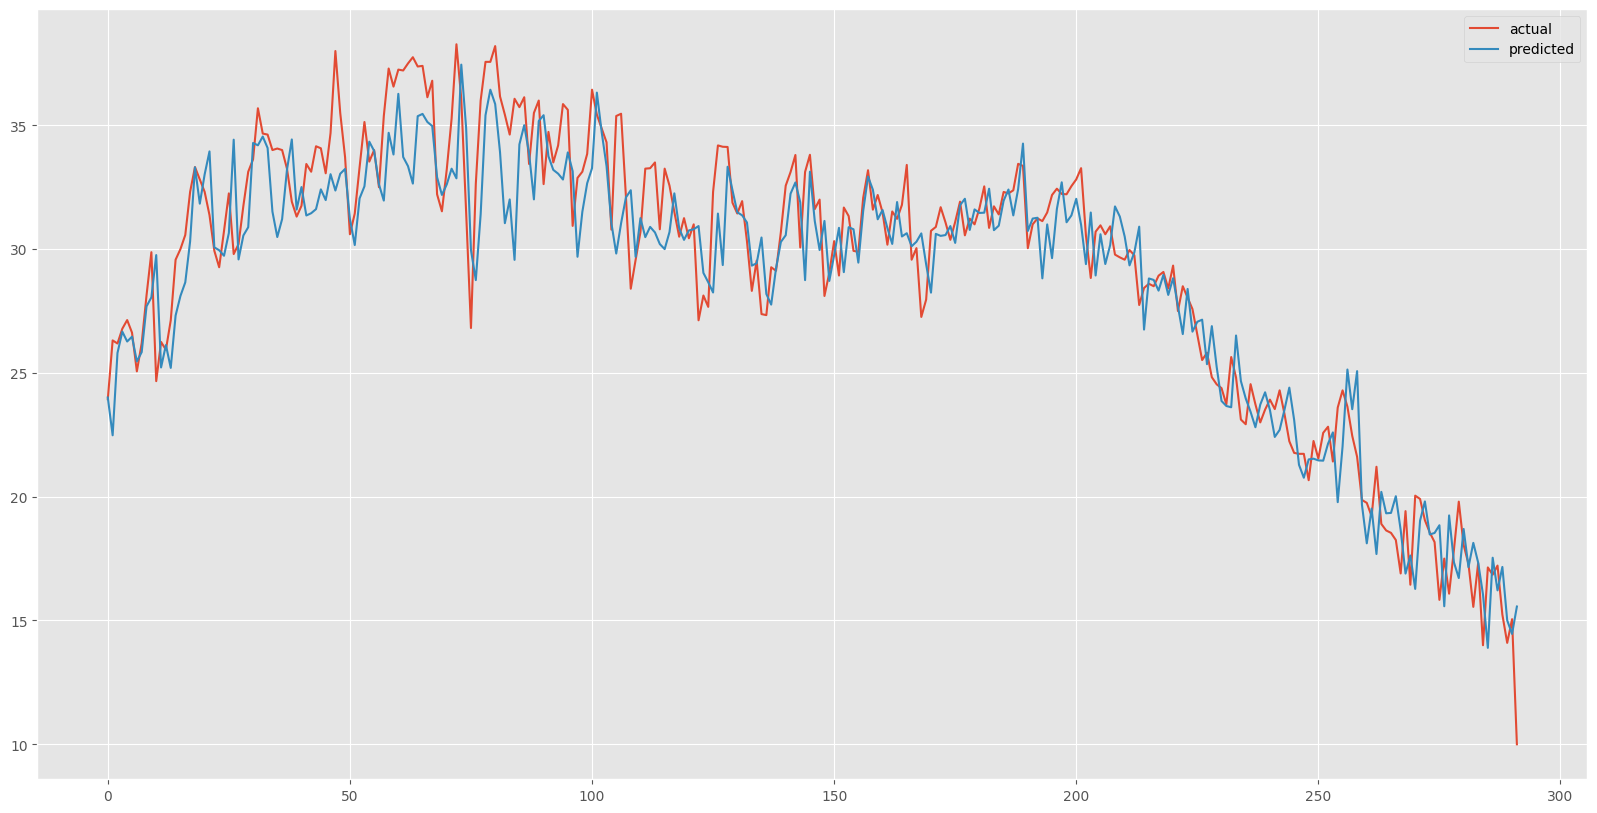

In [35]:
show_time_series_predicts(y_test,xgb_regressor_predict)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [36]:
df_copy

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [37]:
# X = df_copy.drop(columns="meantemp")
# Y = df_copy["meantemp"]

In [38]:
# Write your code here. Add as many boxes as you need.
# x_train_scaled,x_test_scaled,scaler = scale_data(x_train, x_test, strategy="minmax")

In [39]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

In [40]:
x_train_scaled

array([[0.0356623 , 0.86993243, 0.10974262, ..., 0.84037162, 0.        ,
        0.76811594],
       [0.08151383, 0.68468468, 0.02921206, ..., 0.92905405, 0.07058266,
        0.83557312],
       [0.        , 0.86796171, 0.08763619, ..., 0.86993243, 0.10974262,
        0.8629776 ],
       ...,
       [0.56741266, 0.63270693, 0.22471577, ..., 0.52037584, 0.18903955,
        0.68972332],
       [0.55786026, 0.61201436, 0.16209735, ..., 0.64290541, 0.15506079,
        0.66903821],
       [0.50054585, 0.62162162, 0.14862624, ..., 0.63270693, 0.22471577,
        0.57509881]])

In [41]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [42]:
x_train_scaled_shaped = x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], 1)

In [43]:
x_test_scaled_shaped = x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1], 1)

In [44]:
x_train_scaled_shaped

array([[[0.0356623 ],
        [0.86993243],
        [0.10974262],
        ...,
        [0.84037162],
        [0.        ],
        [0.76811594]],

       [[0.08151383],
        [0.68468468],
        [0.02921206],
        ...,
        [0.92905405],
        [0.07058266],
        [0.83557312]],

       [[0.        ],
        [0.86796171],
        [0.08763619],
        ...,
        [0.86993243],
        [0.10974262],
        [0.8629776 ]],

       ...,

       [[0.56741266],
        [0.63270693],
        [0.22471577],
        ...,
        [0.52037584],
        [0.18903955],
        [0.68972332]],

       [[0.55786026],
        [0.61201436],
        [0.16209735],
        ...,
        [0.64290541],
        [0.15506079],
        [0.66903821]],

       [[0.50054585],
        [0.62162162],
        [0.14862624],
        ...,
        [0.63270693],
        [0.22471577],
        [0.57509881]]])

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [2]:
import keras
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
from keras.api.models import Sequential
from keras.api.layers import LSTM, Dense, Dropout
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Write your code here. Add as many boxes as you need.
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])
     

In [ ]:
history = model.fit(x_train_scaled_shaped, y_train_scaled, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

In [ ]:
lstm_predicts = model.predict(x_test_scaled_shaped)

In [ ]:
lstm_predicts = scaler.inverse_transform(lstm_predicts)

In [ ]:
regression_report(y_test, lstm_predicts)

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.